In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [84]:
input_folder = "aggregated"
files = os.listdir(input_folder)

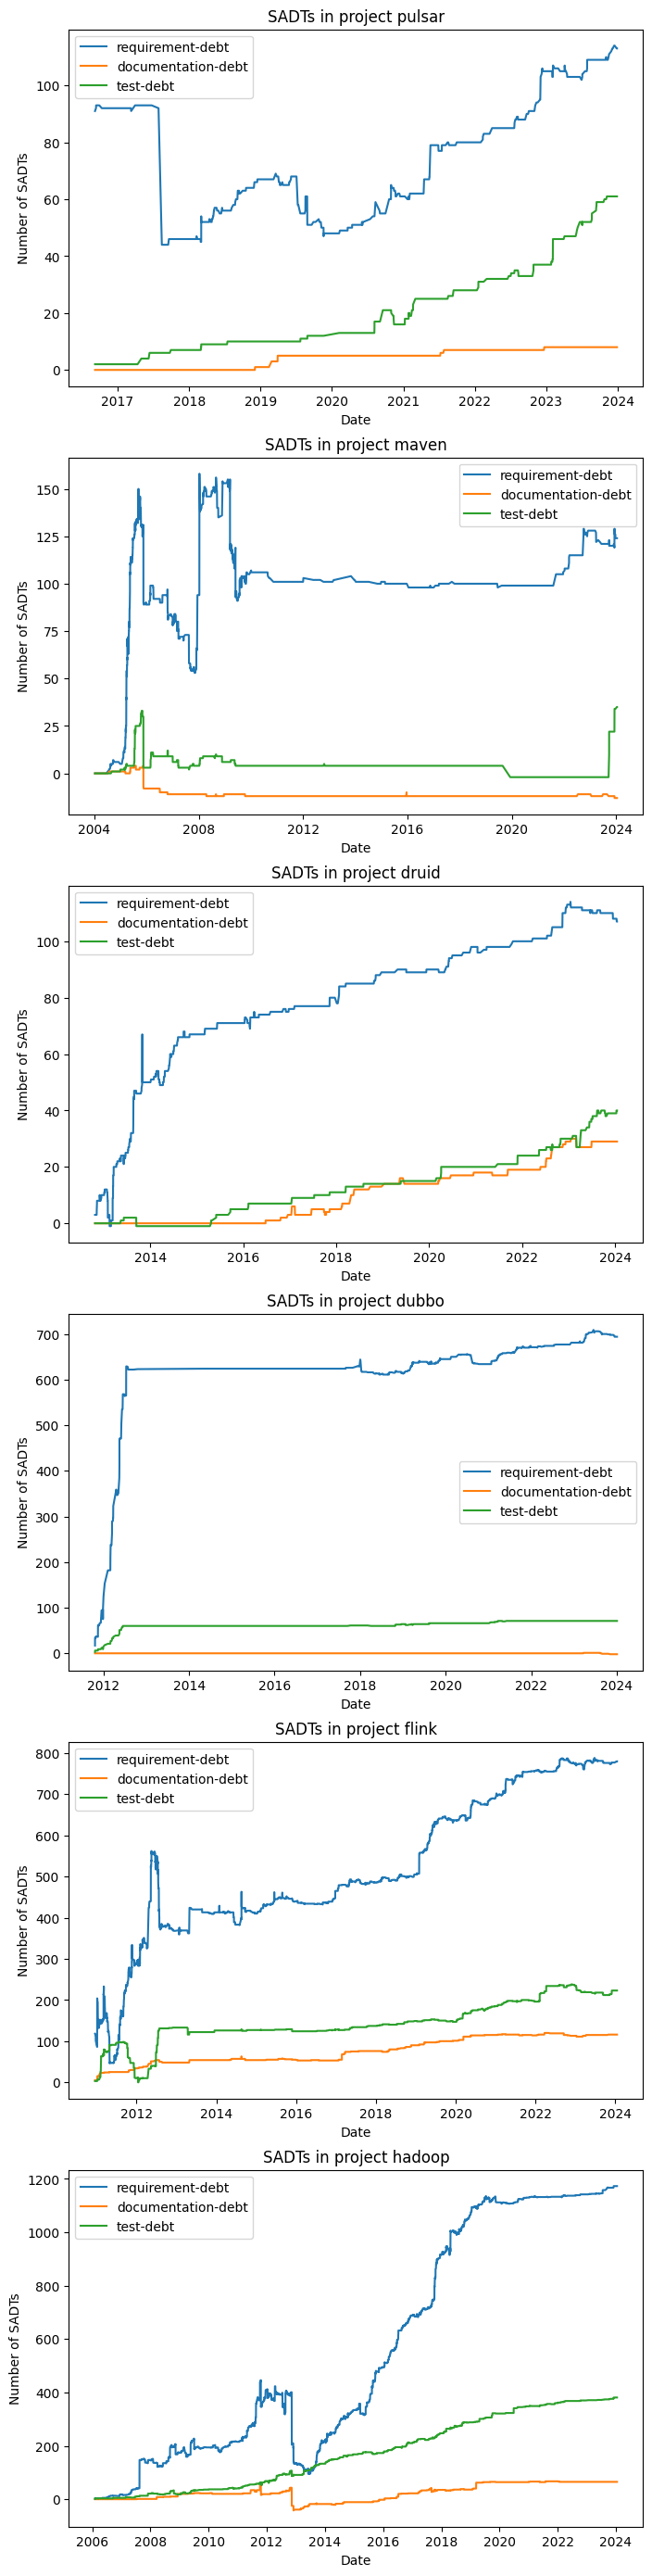

In [85]:
num_subplots = len(files)
num_rows = 1
# Create subplots using the subplots function
fig, axs = plt.subplots(int(num_subplots / num_rows), num_rows, figsize=(8, 35))

for idx, file in enumerate(files):
    name = file.split(".")[0].split("_")[0]
    df = pd.read_csv(f"{input_folder}/{file}")

    axs[idx].set_title(f"SADTs in project {name}")
    axs[idx].set_xlabel("Date")
    axs[idx].set_ylabel("Number of SADTs")
    # plt.plot(df["timestamp"], df["code|design-debt"].cumsum())
    df['date'] = pd.to_datetime(df['timestamp'], unit='s')
    axs[idx].plot(df["date"], df["requirement-debt"].cumsum(), label="requirement-debt")
    axs[idx].plot(df["date"], df["documentation-debt"].cumsum(), label="documentation-debt")
    axs[idx].plot(df["date"], df["test-debt"].cumsum(), label="test-debt")
    axs[idx].legend()

# Adjust layout

# Show the plot
plt.show()


# df["code|design-debt"]
# df["code|design-debt"].cumsum().plot()


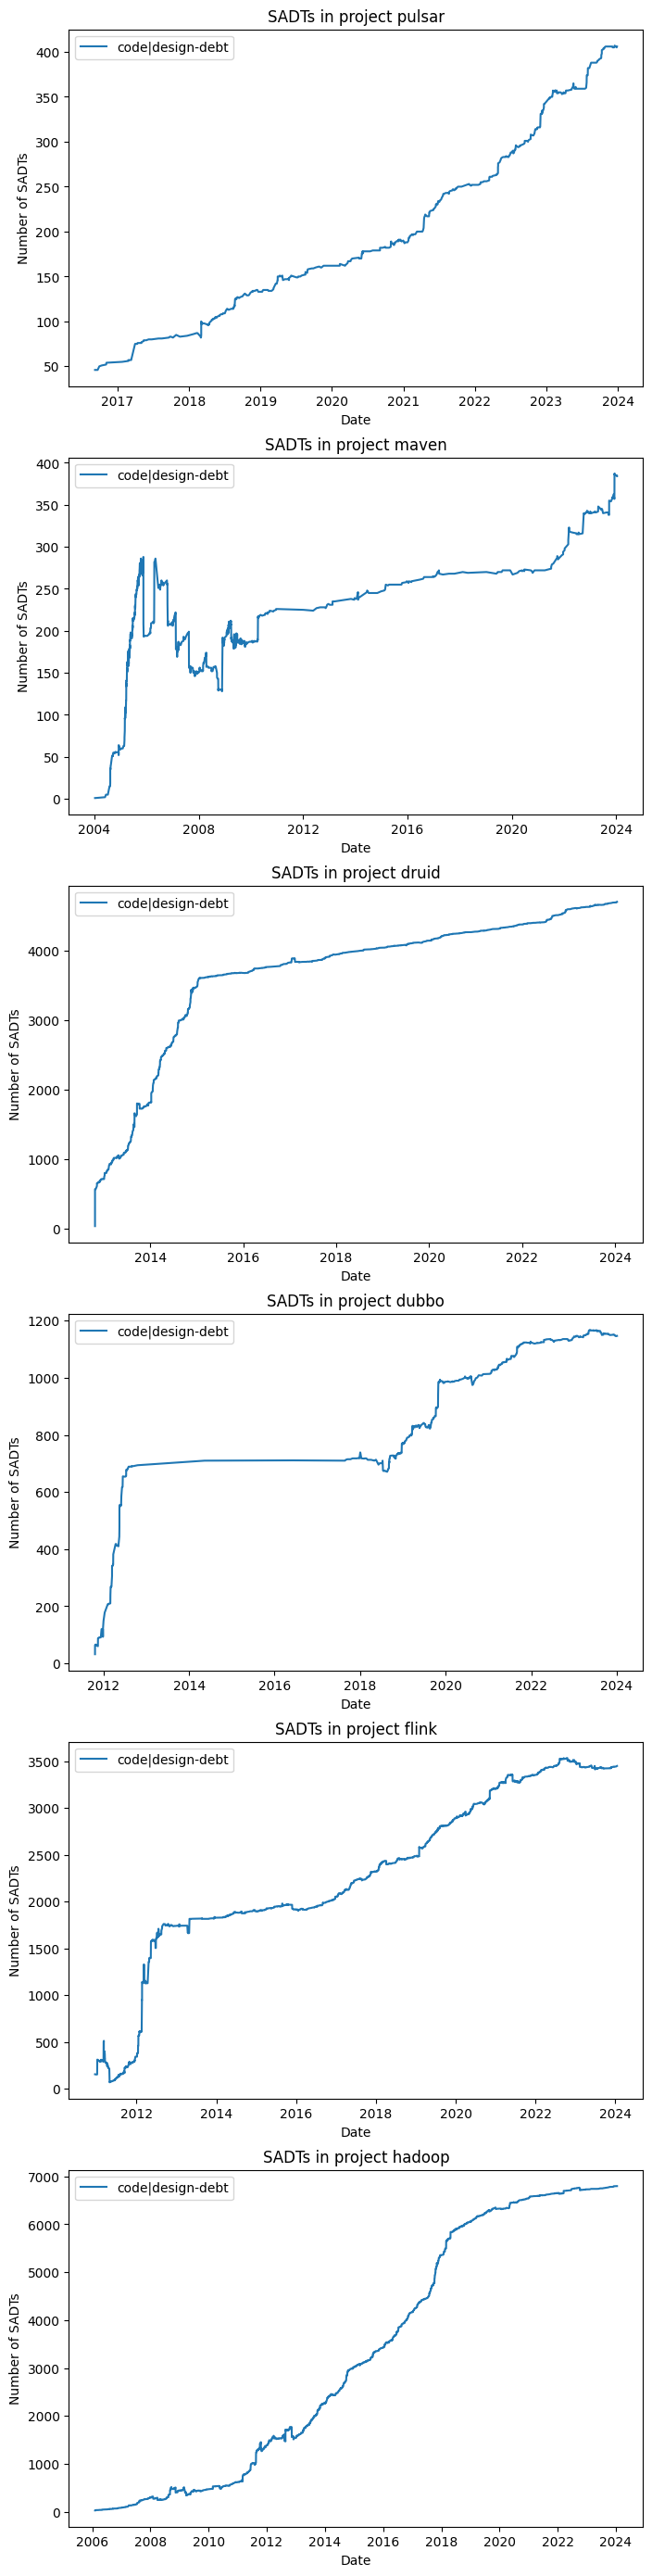

In [82]:
num_subplots = len(files)
num_rows = 1
# Create subplots using the subplots function
fig, axs = plt.subplots(int(num_subplots / num_rows), num_rows, figsize=(8, 35))

for idx, file in enumerate(files):
    name = file.split(".")[0].split("_")[0]
    df = pd.read_csv(f"generated/{file}")

    axs[idx].set_title(f"SADTs in project {name}")
    axs[idx].set_xlabel("Date")
    axs[idx].set_ylabel("Number of SADTs")
    # plt.plot(df["timestamp"], df["code|design-debt"].cumsum())
    df['date'] = pd.to_datetime(df['timestamp'], unit='s')
    axs[idx].plot(df["date"], df["code|design-debt"].cumsum(), label="code|design-debt")
    axs[idx].legend()

# Adjust layout

# Show the plot
plt.show()